In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [90]:
data = pd.read_csv('credit_scoring_train.csv')
print('Размер выборки:', data.shape)
data.head( )

Размер выборки: (75000, 11)


,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
0,0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2,2206.731199,55.5,21,1,NaN,1,0,NaN,0.348227,0
3,3,886.132793,55.3,3,0,0.0,0,0,NaN,0.971930,0
4,4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0


Разведочный анализ Построить визуализацию и прочее

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              75000 non-null  int64  
 1   DIR                    75000 non-null  float64
 2   Age                    75000 non-null  float64
 3   NumLoans               75000 non-null  int64  
 4   NumRealEstateLoans     75000 non-null  int64  
 5   NumDependents          73084 non-null  float64
 6   Num30-59Delinquencies  75000 non-null  int64  
 7   Num60-89Delinquencies  75000 non-null  int64  
 8   Income                 60153 non-null  float64
 9   BalanceToCreditLimit   75000 non-null  float64
 10  Delinquent90           75000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 6.3 MB


In [92]:
data.describe()

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
count,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,73084.000000,75000.000000,75000.000000,6.015300e+04,75000.000000,75000.000000
mean,37499.500000,353.260293,52.595605,8.44976,1.016693,0.755966,0.428320,0.248000,6.740059e+03,6.276196,0.066840
std,21650.779432,2117.237432,14.869729,5.15644,1.124019,1.108119,4.276439,4.239486,1.422875e+04,267.743321,0.249746
min,0.000000,0.000000,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,18749.750000,0.176022,41.300000,5.00000,0.000000,0.000000,0.000000,0.000000,3.421354e+03,0.029703,0.000000
50%,37499.500000,0.366848,52.200000,8.00000,1.000000,0.000000,0.000000,0.000000,5.424552e+03,0.153720,0.000000
75%,56249.250000,0.862650,63.100000,11.00000,2.000000,1.000000,0.000000,0.000000,8.291518e+03,0.560638,0.000000
max,74999.000000,332600.272820,109.800000,56.00000,32.000000,20.000000,98.000000,98.000000,1.805573e+06,50873.874533,1.000000


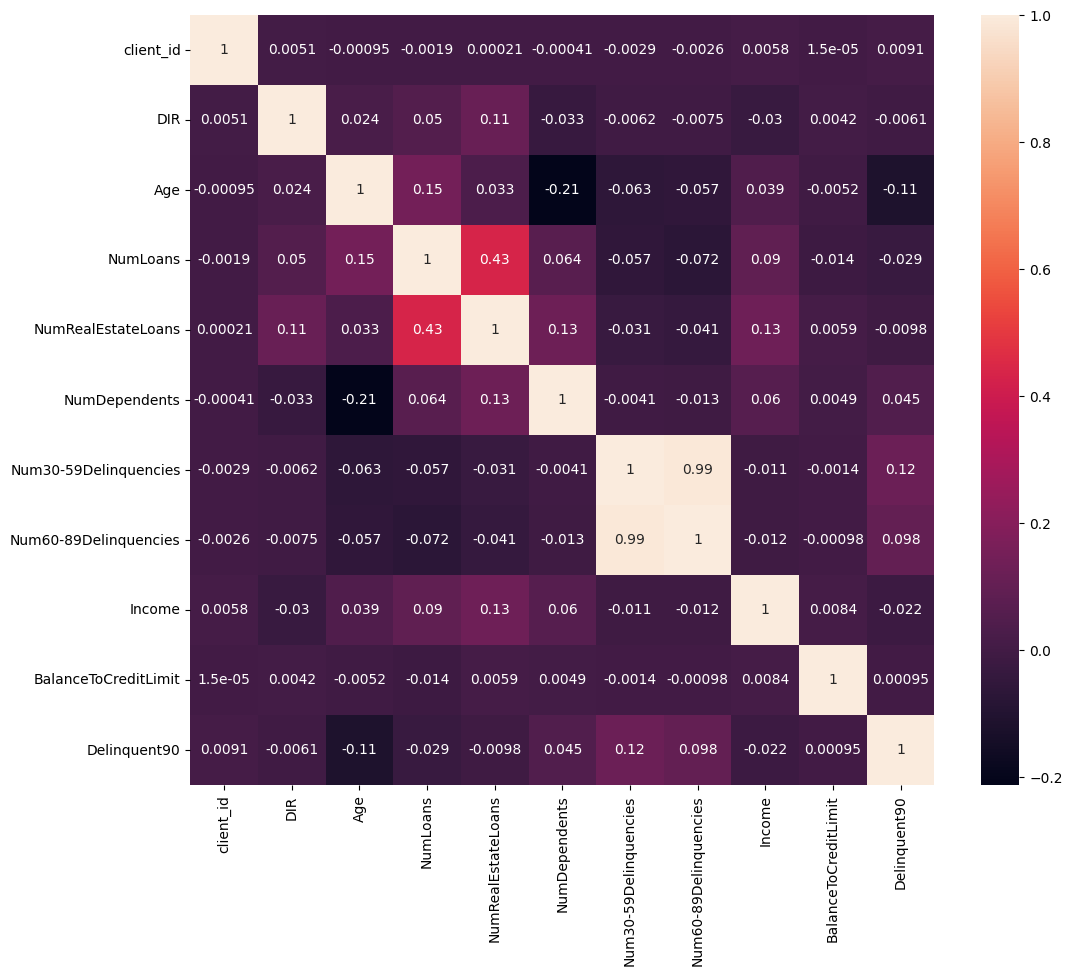

In [93]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True);

array([[<Axes: title={'center': 'client_id'}>,
        <Axes: title={'center': 'DIR'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'NumLoans'}>,
        <Axes: title={'center': 'NumRealEstateLoans'}>,
        <Axes: title={'center': 'NumDependents'}>],
       [<Axes: title={'center': 'Num30-59Delinquencies'}>,
        <Axes: title={'center': 'Num60-89Delinquencies'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'BalanceToCreditLimit'}>,
        <Axes: title={'center': 'Delinquent90'}>, <Axes: >]], dtype=object)

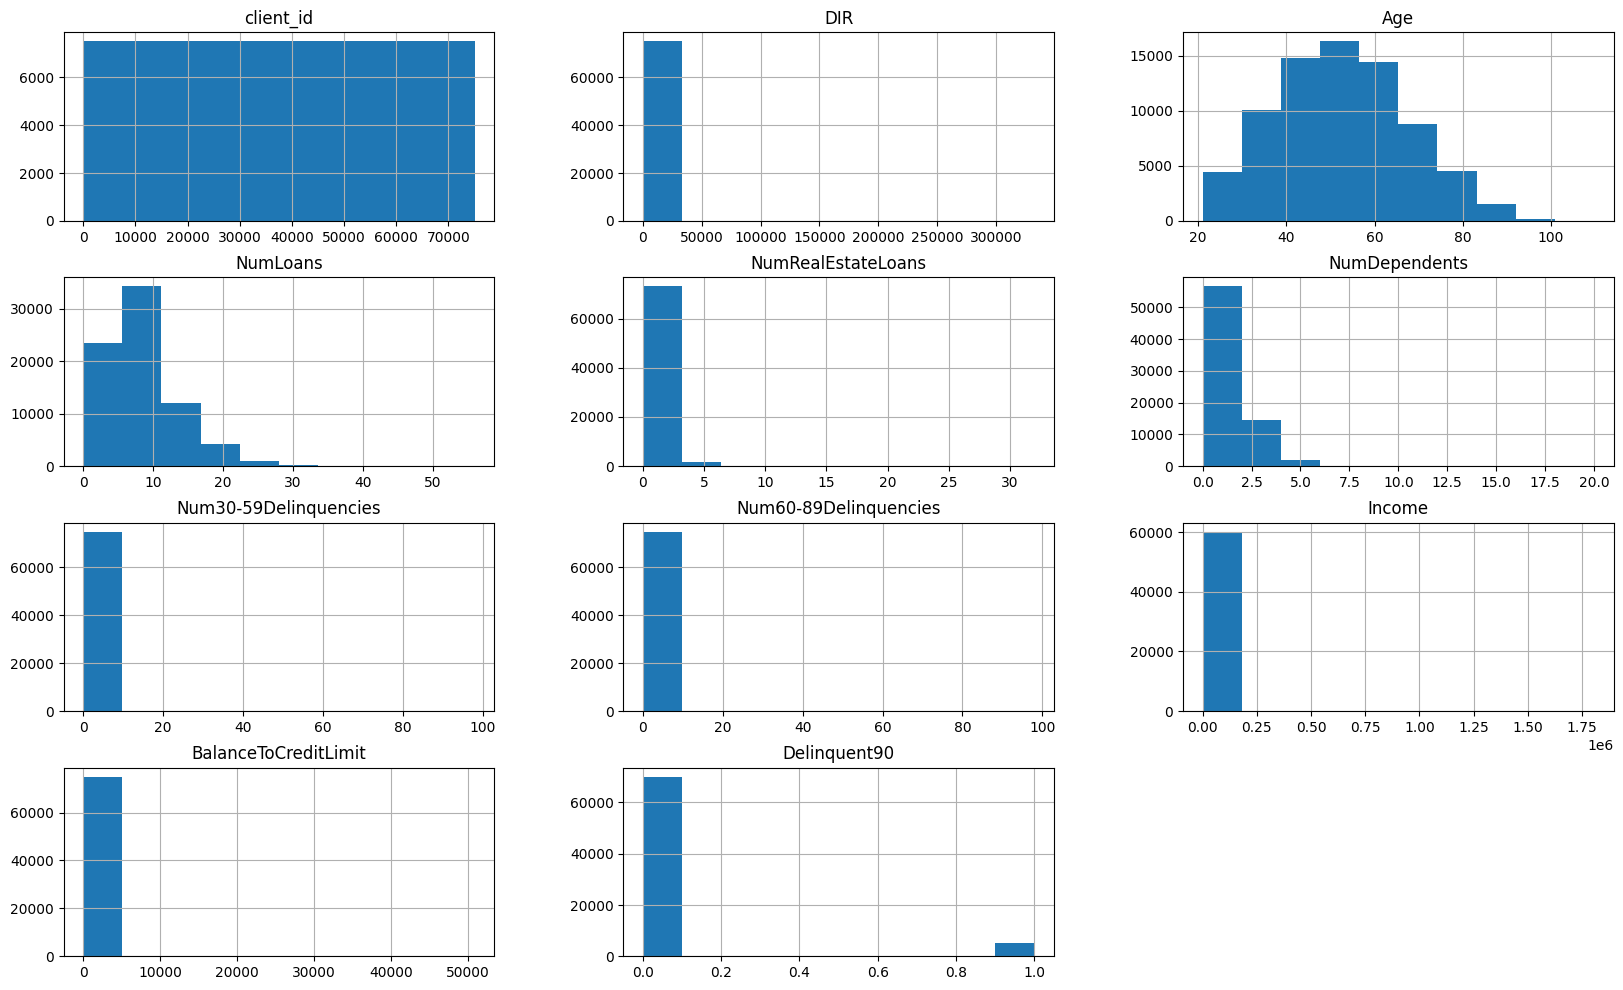

In [94]:
data.hist(figsize=(20,12))

Предобработка данных

In [95]:
(data.isnull().sum() / data.shape[0]) * 100

,0
client_id,0.000000
DIR,0.000000
Age,0.000000
NumLoans,0.000000
NumRealEstateLoans,0.000000
NumDependents,2.554667
Num30-59Delinquencies,0.000000
Num60-89Delinquencies,0.000000
Income,19.796000
BalanceToCreditLimit,0.000000


Восстановление пропущенных значений

In [96]:
!pip3 install nona
from nona.nona import nona
nona(data)

100%|██████████| 11/11 [00:03<00:00,  2.77it/s]


In [97]:
data.dropna(inplace=True)
data.isnull().sum()

,0
client_id,0
DIR,0
Age,0
NumLoans,0
NumRealEstateLoans,0
NumDependents,0
Num30-59Delinquencies,0
Num60-89Delinquencies,0
Income,0
BalanceToCreditLimit,0


Очистим данные от аномальных значений и выбросов на основе интерквартильного размаха

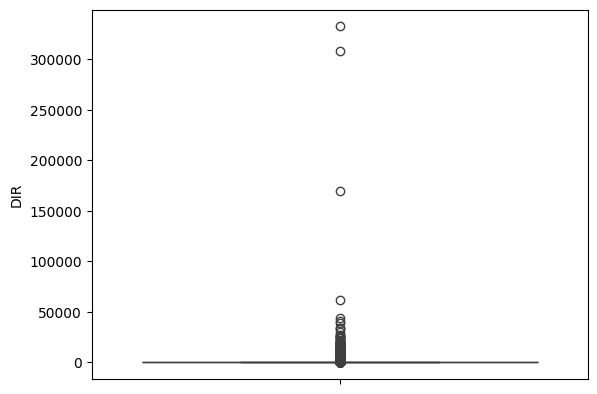

In [98]:
sns.boxplot(data['DIR'])
plt.show();

In [99]:
Q1 = np.percentile(data['DIR'], 25)
Q3 = np.percentile(data['DIR'], 75)
IQR = Q3 - Q1
print(f"Максимальное возможное минимальное количество {Q3 + 1.5 * IQR}")
print(f"Экстремально максимальное возможное минимальное количество {Q3 + 3 * IQR}")

Максимальное возможное минимальное количество 1.892592375
Экстремально максимальное возможное минимальное количество 2.92253475


In [100]:
len(data[data['DIR'] > 1.892592375]) / data.shape[0] * 100

20.810666666666666

In [101]:
len(data[data['DIR'] > 2.92253475]) / data.shape[0] * 100

20.238666666666667

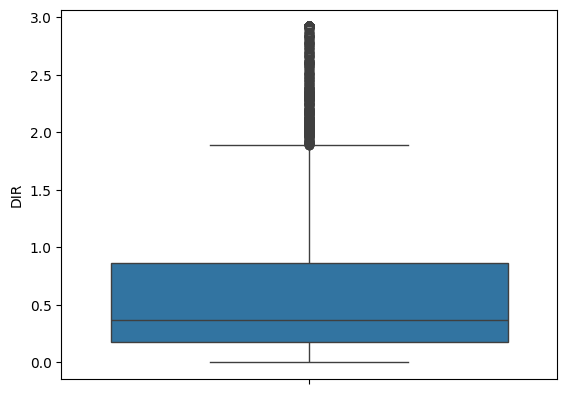

In [102]:
data.loc[data['DIR'] > 2.92253475, 'DIR'] = 2.92253475
sns.boxplot(data['DIR'])
plt.show();

In [103]:
Q1 = np.percentile(data['NumDependents'], 25)
Q3 = np.percentile(data['NumDependents'], 75)
IQR = Q3 - Q1
print(f"Максимальное возможное минимальное количество {Q3 + 1.5 * IQR}")
print(f"Экстремально максимальное возможное минимальное количество {Q3 + 3 * IQR}")

Максимальное возможное минимальное количество 2.5
Экстремально максимальное возможное минимальное количество 4.0


In [104]:
len(data[data['NumDependents'] > 2.5]) / data.shape[0] * 100

8.690666666666665

In [105]:
len(data[data['NumDependents'] > 4.0]) / data.shape[0] * 100

0.62

тк 2,5 чел быть не может заменим на 3

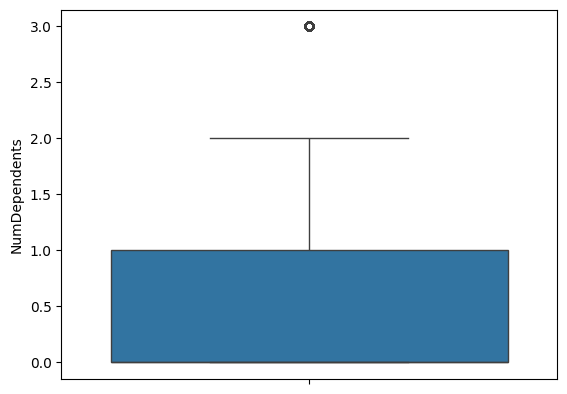

In [106]:
data.loc[data['NumDependents'] > 3, 'NumDependents'] = 3
sns.boxplot(data['NumDependents'])
plt.show();

array([[<Axes: title={'center': 'client_id'}>,
        <Axes: title={'center': 'DIR'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'NumLoans'}>,
        <Axes: title={'center': 'NumRealEstateLoans'}>,
        <Axes: title={'center': 'NumDependents'}>],
       [<Axes: title={'center': 'Num30-59Delinquencies'}>,
        <Axes: title={'center': 'Num60-89Delinquencies'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'BalanceToCreditLimit'}>,
        <Axes: title={'center': 'Delinquent90'}>, <Axes: >]], dtype=object)

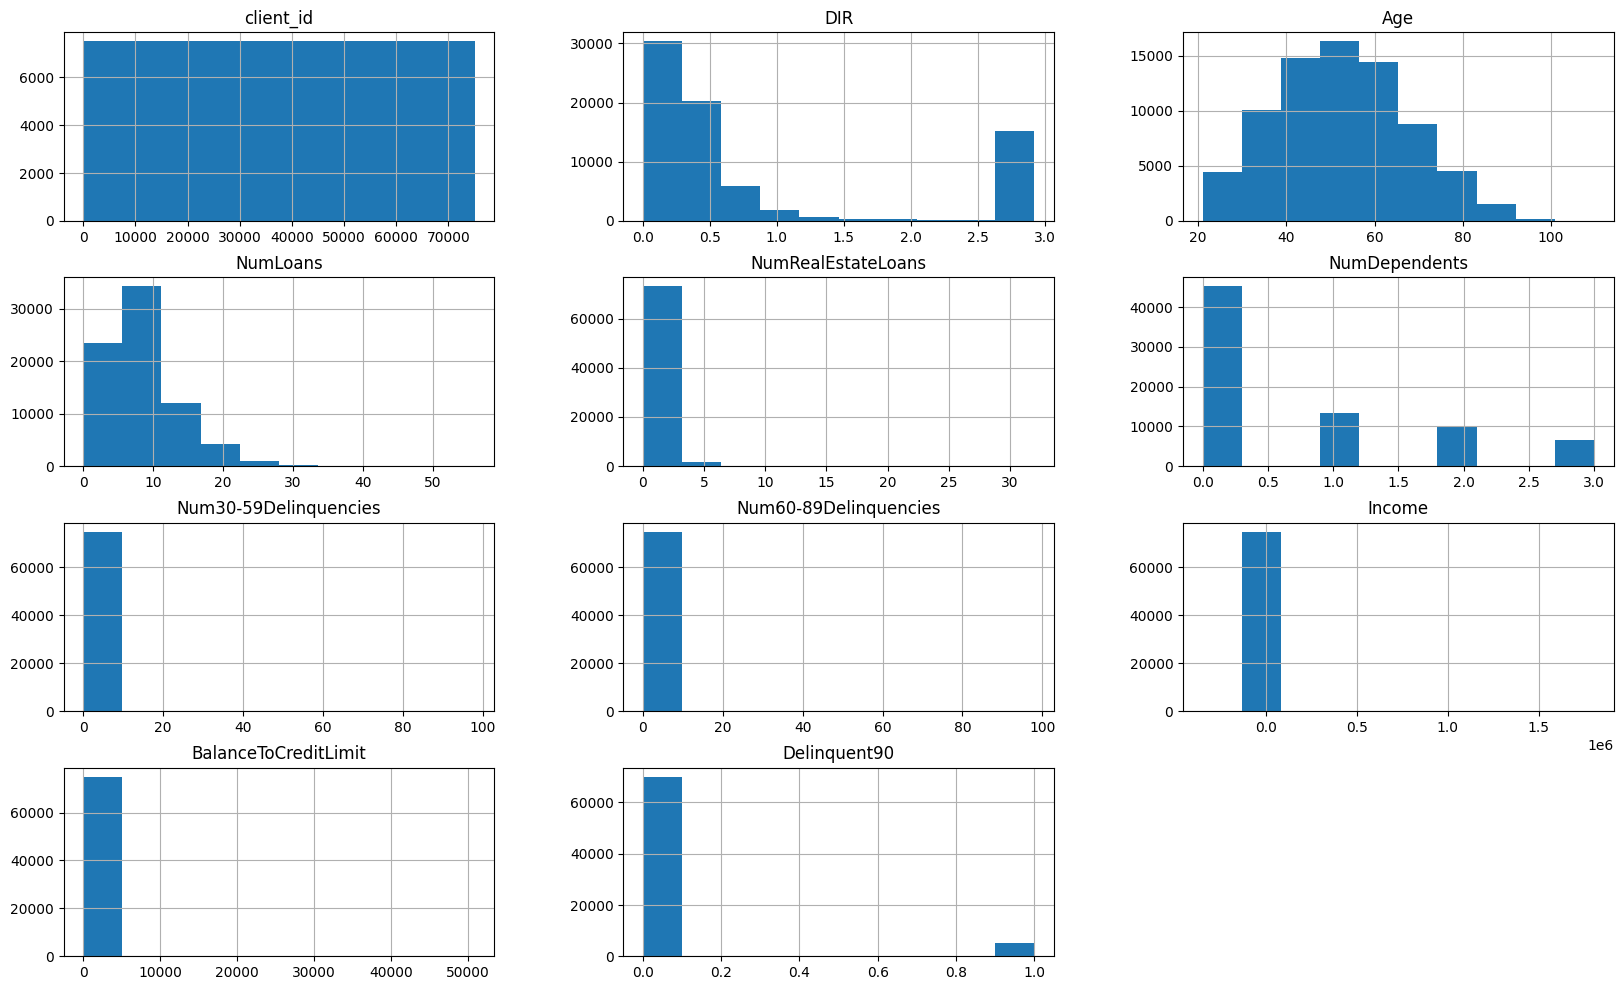

In [107]:
data.hist(figsize=(20,12))

Удаляем клиент айди потому что по факту она не нужна

In [108]:
data.drop(columns = ['client_id' ] , inplace = True)
data.head()

,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2.922535,55.5,21,1,0.0,1,0,4946.330556,0.348227,0
3,2.922535,55.3,3,0,0.0,0,0,3326.206493,0.971930,0
4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0


In [109]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DIR,75000.0,0.869887,1.074695,0.000000,0.176022,0.366848,0.862650,2.922535e+00
Age,75000.0,52.595605,14.869729,21.000000,41.300000,52.200000,63.100000,1.098000e+02
NumLoans,75000.0,8.449760,5.156440,0.000000,5.000000,8.000000,11.000000,5.600000e+01
NumRealEstateLoans,75000.0,1.016693,1.124019,0.000000,0.000000,1.000000,2.000000,3.200000e+01
NumDependents,75000.0,0.702907,0.997511,0.000000,0.000000,0.000000,1.000000,3.000000e+00
Num30-59Delinquencies,75000.0,0.428320,4.276439,0.000000,0.000000,0.000000,0.000000,9.800000e+01
Num60-89Delinquencies,75000.0,0.248000,4.239486,0.000000,0.000000,0.000000,0.000000,9.800000e+01
Income,75000.0,6266.355146,12939.435343,-351686.690509,3482.153337,5045.571020,7457.479661,1.805573e+06
BalanceToCreditLimit,75000.0,6.276196,267.743321,0.000000,0.029703,0.153720,0.560638,5.087387e+04
Delinquent90,75000.0,0.066840,0.249746,0.000000,0.000000,0.000000,0.000000,1.000000e+00


In [110]:
Q1 = np.percentile(data['BalanceToCreditLimit'], 25)
Q3 = np.percentile(data['BalanceToCreditLimit'], 75)
IQR = Q3 - Q1
print(f"Максимальное возможное минимальное количество {Q3 + 1.5 * IQR}")
print(f"Экстремально максимальное возможное минимальное количество {Q3 + 3 * IQR}")

Максимальное возможное минимальное количество 1.357039875
Экстремально максимальное возможное минимальное количество 2.153442


In [111]:
len(data[data['BalanceToCreditLimit'] > 1.357039875]) / data.shape[0] * 100

0.5306666666666667

In [112]:
len(data[data['BalanceToCreditLimit'] > 2.153442]) / data.shape[0] * 100

0.22799999999999998

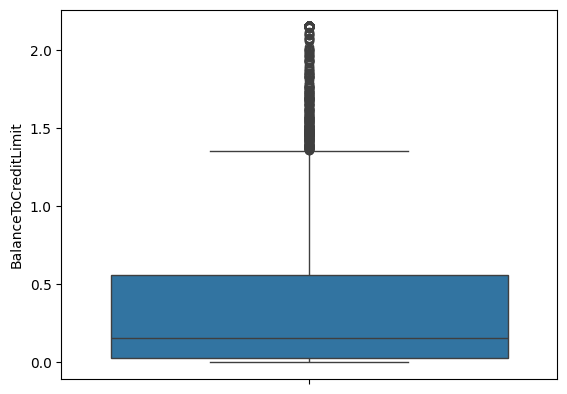

In [113]:
data.loc[data['BalanceToCreditLimit'] > 2.153442, 'BalanceToCreditLimit'] = 2.153442
sns.boxplot(data['BalanceToCreditLimit'])
plt.show();

array([[<Axes: title={'center': 'DIR'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'NumLoans'}>],
       [<Axes: title={'center': 'NumRealEstateLoans'}>,
        <Axes: title={'center': 'NumDependents'}>,
        <Axes: title={'center': 'Num30-59Delinquencies'}>],
       [<Axes: title={'center': 'Num60-89Delinquencies'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'BalanceToCreditLimit'}>],
       [<Axes: title={'center': 'Delinquent90'}>, <Axes: >, <Axes: >]],
      dtype=object)

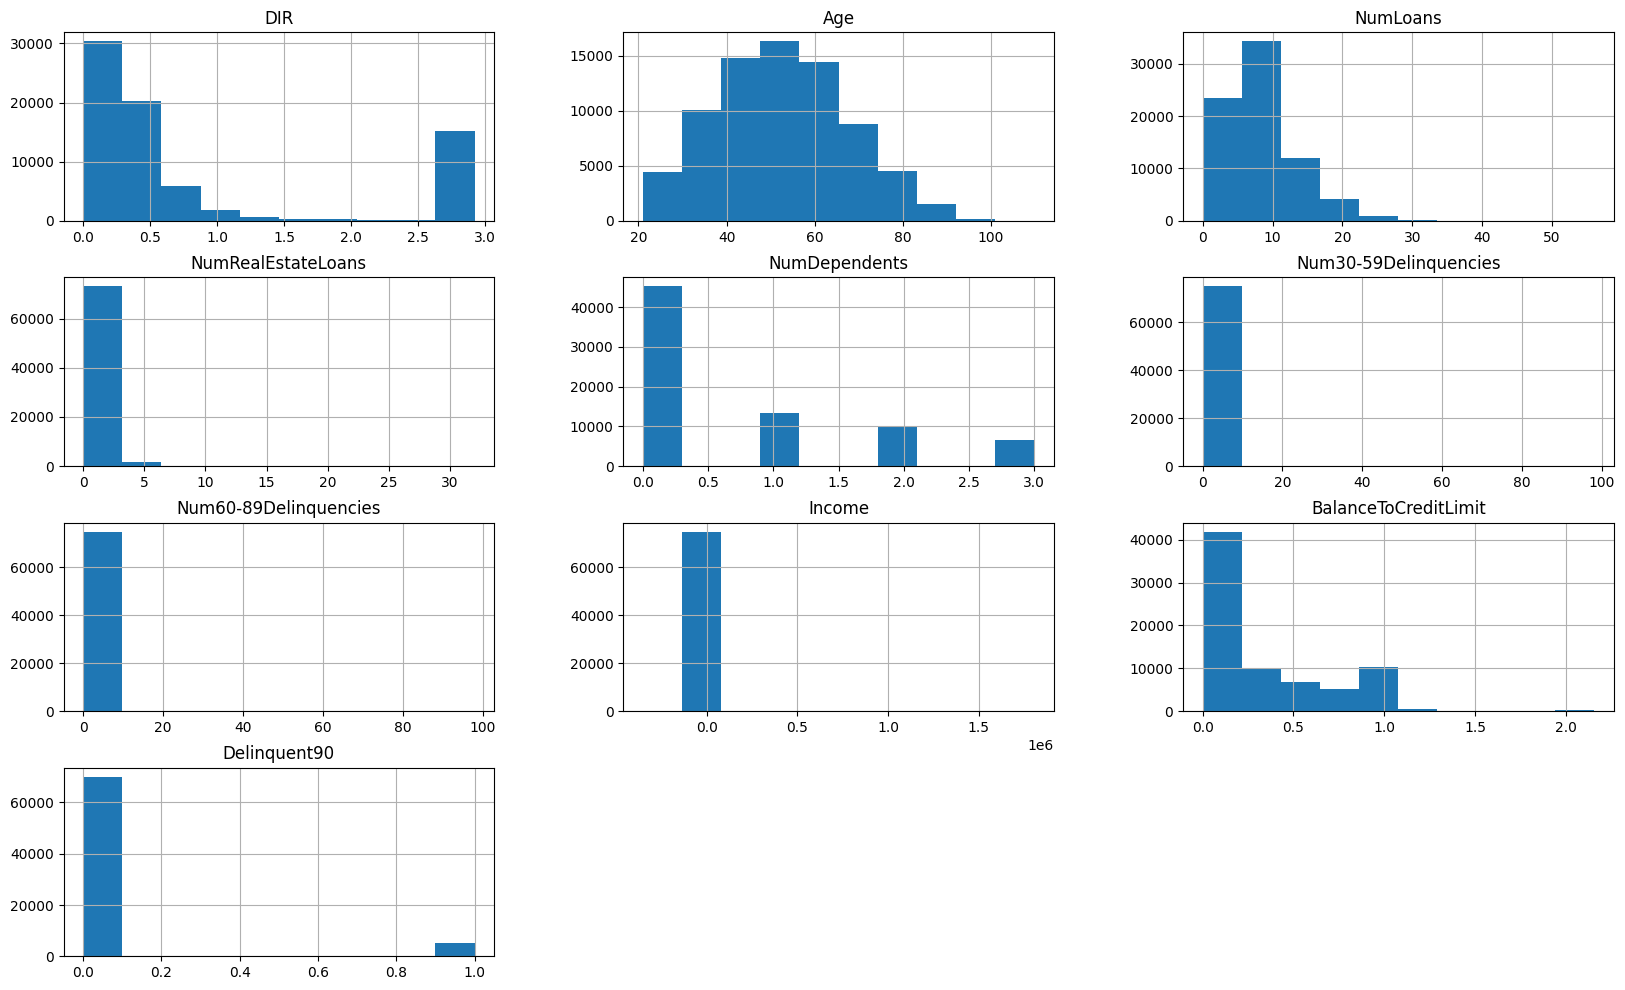

In [114]:
data.hist(figsize=(20,12))

In [115]:
Q1 = np.percentile(data['NumRealEstateLoans'], 25)
Q3 = np.percentile(data['NumRealEstateLoans'], 75)
IQR = Q3 - Q1
print(f"Максимальное возможное минимальное количество {Q3 + 1.5 * IQR}")
print(f"Экстремально максимальное возможное минимальное количество {Q3 + 3 * IQR}")

Максимальное возможное минимальное количество 5.0
Экстремально максимальное возможное минимальное количество 8.0


In [116]:
len(data[data['NumRealEstateLoans'] > 5.0]) / data.shape[0] * 100

0.5680000000000001

In [117]:
len(data[data['NumRealEstateLoans'] > 8.0]) / data.shape[0] * 100

0.13733333333333334

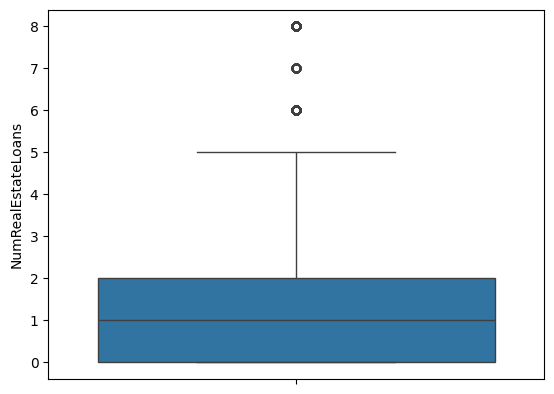

In [118]:
data.loc[data['NumRealEstateLoans'] > 8.0, 'NumRealEstateLoans'] = 8.0
sns.boxplot(data['NumRealEstateLoans'])
plt.show();

In [119]:
Q1 = np.percentile(data['Num60-89Delinquencies'], 25)
Q3 = np.percentile(data['Num60-89Delinquencies'], 75)
IQR = Q3 - Q1
print(f"Максимальное возможное минимальное количество {Q3 + 1.5 * IQR}")
print(f"Экстремально максимальное возможное минимальное количество {Q3 + 3 * IQR}")

Максимальное возможное минимальное количество 0.0
Экстремально максимальное возможное минимальное количество 0.0


In [120]:
Q1 = np.percentile(data['Num30-59Delinquencies'], 25)
Q3 = np.percentile(data['Num30-59Delinquencies'], 75)
IQR = Q3 - Q1
print(f"Максимальное возможное минимальное количество {Q3 + 1.5 * IQR}")
print(f"Экстремально максимальное возможное минимальное количество {Q3 + 3 * IQR}")

Максимальное возможное минимальное количество 0.0
Экстремально максимальное возможное минимальное количество 0.0


Смотрим матрицу корреляции

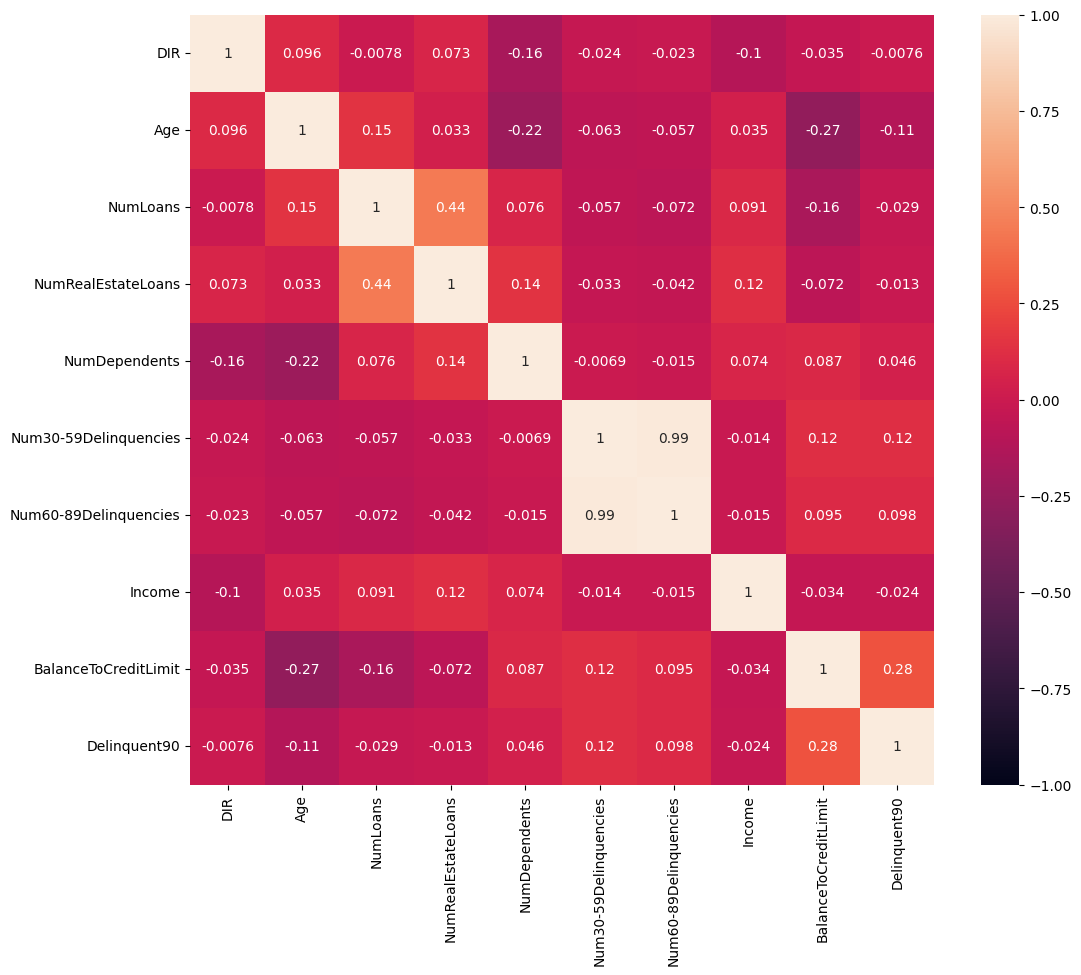

In [121]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1);

ну вроде неплохо начинаем обучать модель


In [122]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DIR,75000.0,0.869887,1.074695,0.000000,0.176022,0.366848,0.862650,2.922535e+00
Age,75000.0,52.595605,14.869729,21.000000,41.300000,52.200000,63.100000,1.098000e+02
NumLoans,75000.0,8.449760,5.156440,0.000000,5.000000,8.000000,11.000000,5.600000e+01
NumRealEstateLoans,75000.0,1.011573,1.071927,0.000000,0.000000,1.000000,2.000000,8.000000e+00
NumDependents,75000.0,0.702907,0.997511,0.000000,0.000000,0.000000,1.000000,3.000000e+00
Num30-59Delinquencies,75000.0,0.428320,4.276439,0.000000,0.000000,0.000000,0.000000,9.800000e+01
Num60-89Delinquencies,75000.0,0.248000,4.239486,0.000000,0.000000,0.000000,0.000000,9.800000e+01
Income,75000.0,6266.355146,12939.435343,-351686.690509,3482.153337,5045.571020,7457.479661,1.805573e+06
BalanceToCreditLimit,75000.0,0.325972,0.368633,0.000000,0.029703,0.153720,0.560638,2.153442e+00
Delinquent90,75000.0,0.066840,0.249746,0.000000,0.000000,0.000000,0.000000,1.000000e+00


гистограмма целевой переменной


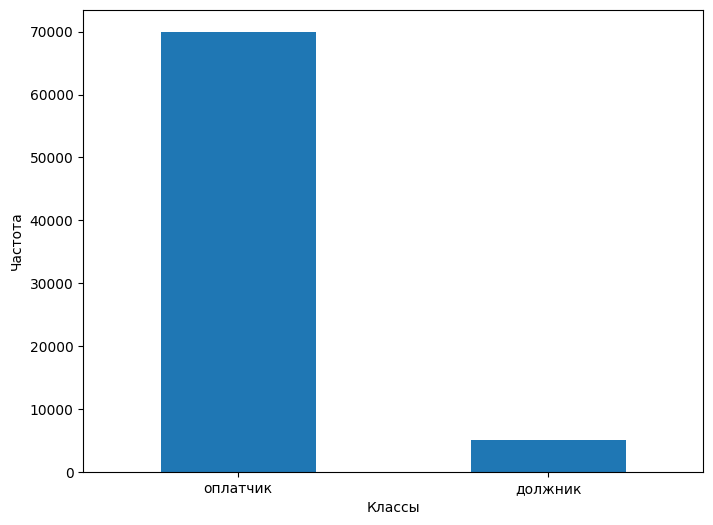

In [123]:
plt.figure(figsize=(8, 6))
data['Delinquent90'].value_counts().plot(kind='bar')
plt.xlabel('Классы')
plt.ylabel('Частота')
plt.xticks(ticks=[0, 1], labels=['оплатчик', 'должник'], rotation=0)
plt.show()

In [124]:
from sklearn.model_selection import train_test_split

X = data.drop('Delinquent90', axis=1)
y = data['Delinquent90']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80, stratify=y)

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import seaborn as sns

model = DecisionTreeClassifier(max_depth=5, random_state=80)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=80)

In [126]:
x_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, x_proba)
print(f'roc-auc: {roc_auc}')

roc-auc: 0.838526251637315


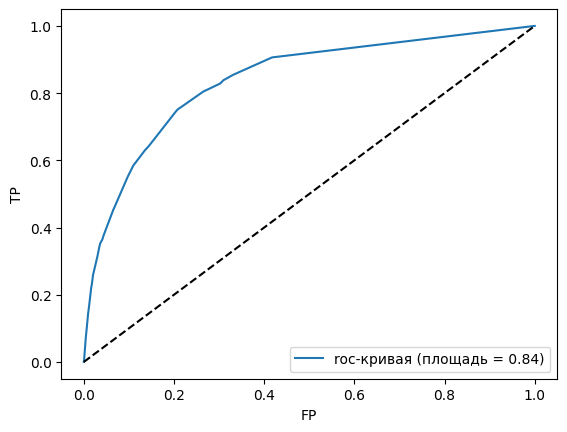

In [127]:
fpr, tpr, thresholds = roc_curve(y_test, x_proba)

plt.figure()
plt.plot(fpr, tpr, label='roc-кривая (площадь = {:.2f})'.format(roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP')
plt.ylabel('TP')

plt.legend(loc='lower right')
plt.show()



матрица неточностей

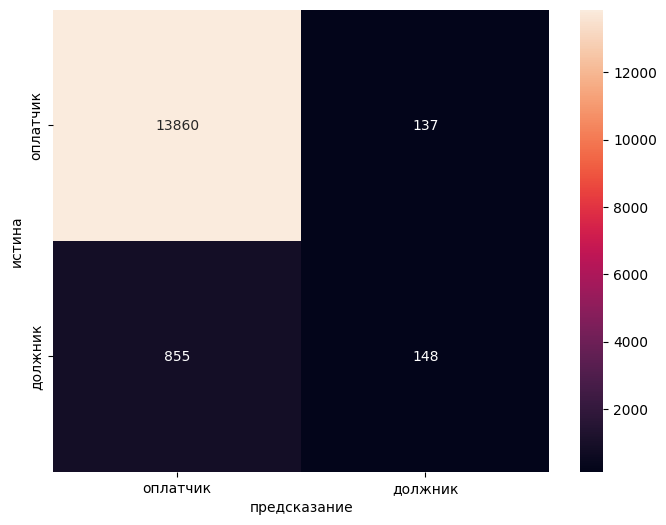

In [128]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['оплатчик', 'должник'], yticklabels=['оплатчик', 'должник'])
plt.ylabel('истина')
plt.xlabel('предсказание')
plt.show()

In [129]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_cv = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=80),
    param_grid=parameter_grid,
    scoring='roc_auc',
    cv=5
)

grid_search_cv.fit(X_train, y_train)

optimal_model = grid_search_cv.best_estimator_
best_roc_auc_score = grid_search_cv.best_score_
optimal_params = grid_search_cv.best_params_

print(f'оптимальные параметры: {optimal_params}')
print(f'лучший roc-auc: {best_roc_auc_score:}')

оптимальные параметры: {'max_depth': 5, 'min_samples_leaf': 1}
лучший roc-auc: 0.8226417457873445


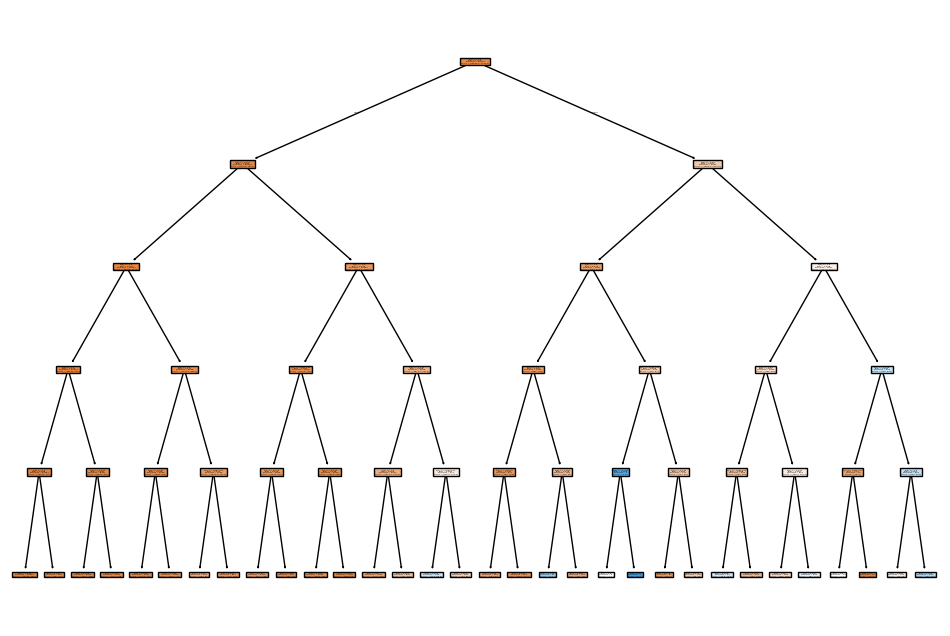

In [130]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(optimal_model, filled=True)
plt.show()

# **Практическая работа, часть 2**


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

создание моделт

In [132]:
ranforest = RandomForestClassifier(n_estimators=30, n_jobs=-1, class_weight='balanced', random_state=80)
ranforest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=30, n_jobs=-1,
                       random_state=80)

 получаем вероятности для roc-auc

In [133]:
y_proba = ranforest.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

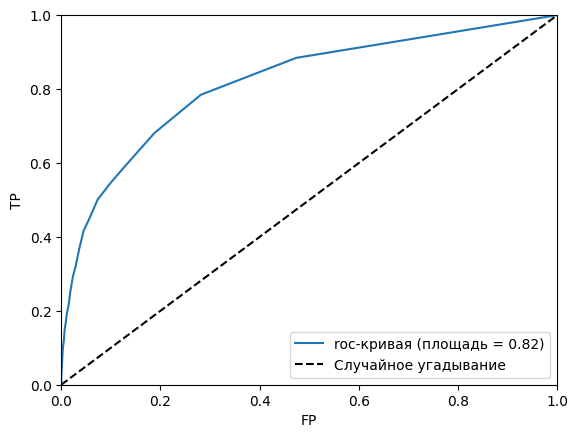

roc auc для случайного леса: 0.82


In [134]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'roc-кривая (площадь = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Случайное угадывание')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FP')
plt.ylabel('TP')

plt.legend(loc='lower right')
plt.show()

print(f'roc auc для случайного леса: {roc_auc:.2f}')

In [135]:
importances = ranforest.feature_importances_
feature_names = X.columns

In [136]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

визуализируем

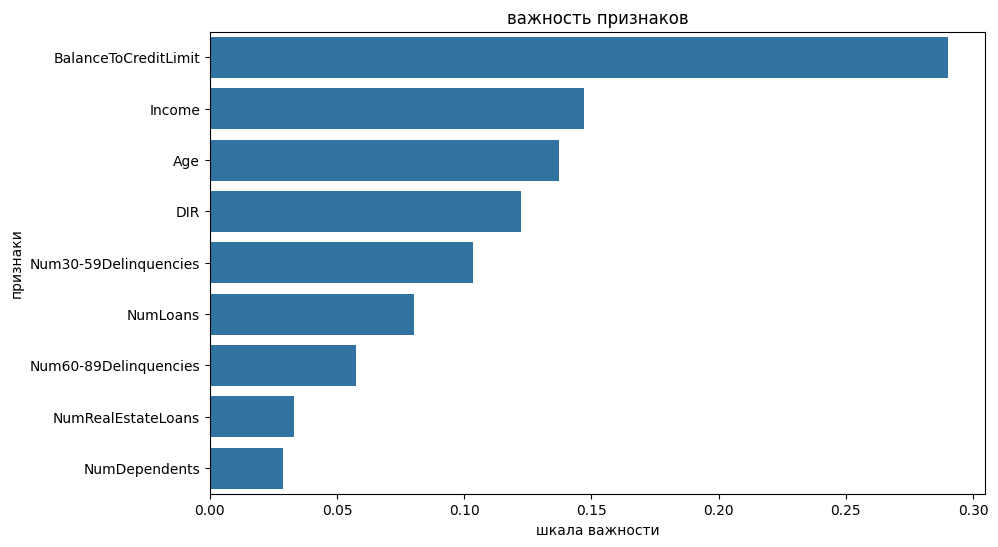

In [137]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('важность признаков')
plt.xlabel('шкала важности')
plt.ylabel('признаки')
plt.show()